<a href="https://colab.research.google.com/github/laurynasjs/tribe_of_ai_courses/blob/master/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Natural Language Processing with Disaster Tweets

> In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified.

https://www.kaggle.com/c/nlp-getting-started/overview/description

## imports

In [3]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastai.text.all import *
from fastai.text import *

     |████████████████████████████████| 727kB 7.2MB/s 
     |████████████████████████████████| 204kB 37.0MB/s 
     |████████████████████████████████| 1.2MB 48.7MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !pip install --upgrade --force-reinstall --no-deps kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lauriux","key":"4710ed5da01da483630a54dd5d336365"}'}

In [8]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-05-15 08:36:45           5294  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2923  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            335  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1768  
imsparsh/musicnet-dataset                                   MusicNet Dataset

In [ ]:
!kaggle competitions list -s 'nlp'

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
nlp-getting-started                                2030-01-01 00:00:00  Getting Started  Knowledge       2721            True  
jigsaw-unintended-bias-in-toxicity-classification  2019-07-18 19:35:00  Featured           $65,000       3165           False  
google-quest-challenge                             2020-02-10 23:59:00  Featured           $25,000       1571           False  
gendered-pronoun-resolution                        2019-04-22 23:59:00  Research           $25,000        838           False  
word2vec-nlp-tutorial                              2015-06-30 23:59:00  Getting Started  Knowledge        577           False  
trec-covid-information-retrieval                   2020-06-03 11:00:00  Research             Kudos      

In [9]:
!mkdir nlp-getting-started

In [10]:
!kaggle competitions download 'nlp-getting-started' -p /content/nlp-getting-started/ 

  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 36.3MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 58.2MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 62.6MB/s]


In [9]:
!ls nlp-getting-started/

sample_submission.csv  test.csv  train.csv


In [ ]:
# !mv "sample_submission.csv" "nlp-getting-started"

In [19]:
# !unzip nlp-getting-started/nlp-getting-started.zip -d nlp-getting-started/

Archive:  nlp-getting-started/nlp-getting-started.zip
  inflating: nlp-getting-started/sample_submission.csv  
  inflating: nlp-getting-started/test.csv  
  inflating: nlp-getting-started/train.csv  


## reading data

In [11]:
path = Path("nlp-getting-started")
Path.BASE_PATH = path
path.ls()

(#3) [Path('train.csv'),Path('test.csv'),Path('sample_submission.csv')]

In [12]:
df = pd.read_csv(path/'train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [14]:
train = pd.read_csv(path/'train.csv')
test = pd.read_csv(path/'test.csv')

In [14]:
# df_train = pd.read_csv('nlp-getting-started/train.csv', dtype={'id': np.int16, 'target': np.int8})
# df_test = pd.read_csv('nlp-getting-started/test.csv', dtype={'id': np.int16})

# print('Training Set Shape = {}'.format(df_train.shape))
# print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
# print('Test Set Shape = {}'.format(df_test.shape))
# print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.20 MB
Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.08 MB


In [75]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [119]:
text_columns = 'text'
df = pd.concat([train, test], axis=0).loc[:, text_columns].to_frame()
print(df.shape)
df.head()

(10876, 1)


,text
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3,"13,000 people receive #wildfires evacuation orders in California"
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school


## EDA

In [74]:
train[train["target"]==1]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


In [28]:
train[train["target"]==0]

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Lion gig tonight. Hearing is wrecked. http://t.co/oMNBAtJEAO,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's stock - CNBC http://t.co/N6RBnHMTD4,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Kittens finally arrived! gameofkittens #explodingkittensÛ_ https://t.co/TFGrAyuDC5,0
7587,10841,NaN,NaN,Sirens everywhere!,0


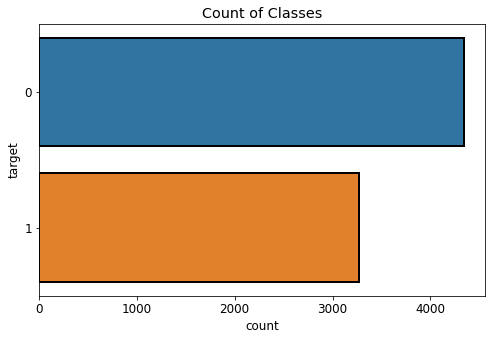

In [29]:
# Visualizing the target classes
plt.figure(figsize=(8,5))
plt.title("Count of Classes")
sns.countplot(y=train["target"],linewidth=2,
                   edgecolor='black')

plt.show()

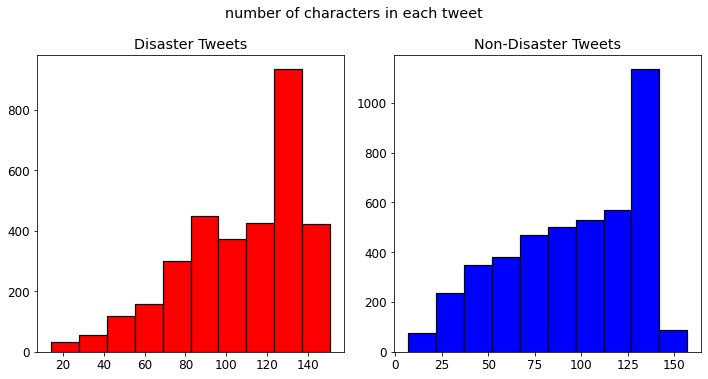

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

char_len = train.loc[train['target']==1, 'text'].str.len()
ax1.hist(char_len, color='red', edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')

char_len = train.loc[train['target']==0, 'text'].str.len()
ax2.hist(char_len_ndis, color='blue', edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')

plt.suptitle("number of characters in each tweet",  y=1.05)
plt.tight_layout()
plt.show()

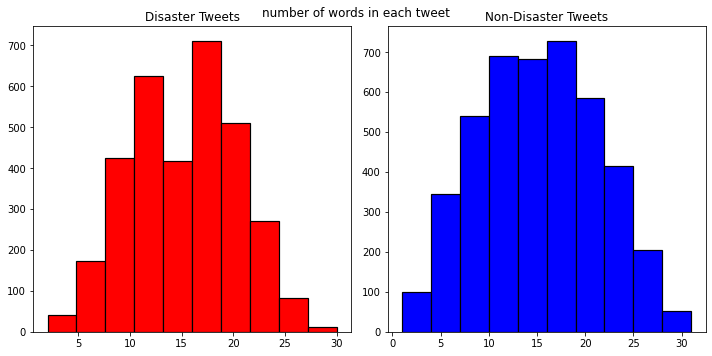

In [140]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

char_len_dis = train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(char_len_dis,color='red',edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')

char_len_ndis = train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(char_len_ndis,color='blue',edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')

plt.suptitle("number of words in each tweet")
plt.tight_layout()
plt.show()

In [53]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


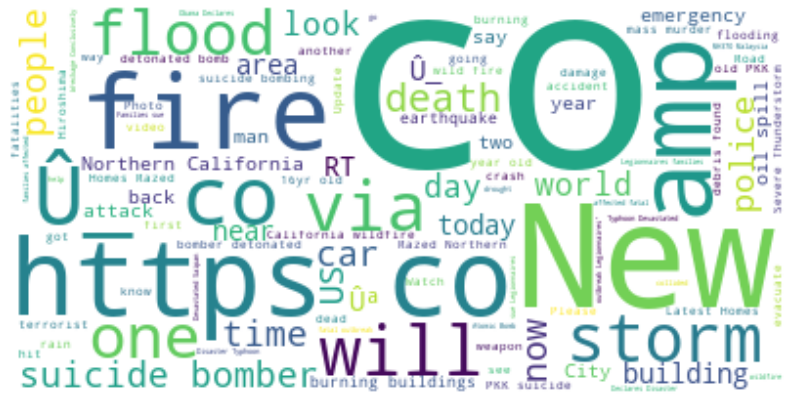

In [54]:
from wordcloud import WordCloud

plt.figure(figsize=(14, 10))
wc = WordCloud(background_color='white')
wc.generate(' '.join(train.loc[train['target']==1, 'text']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

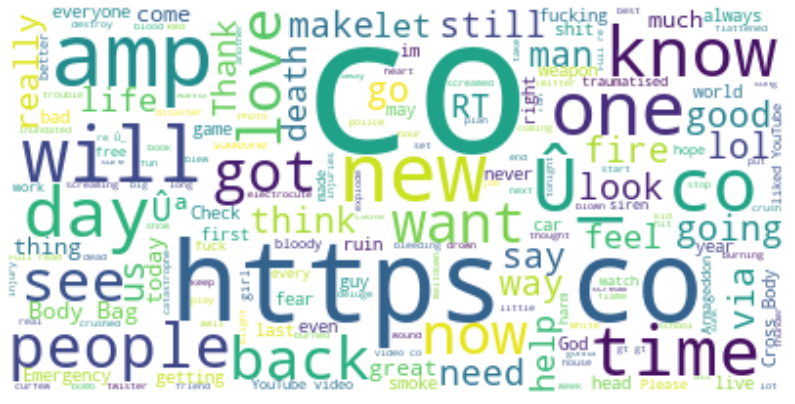

In [55]:
plt.figure(figsize=(14, 10))
wc = WordCloud(background_color='white')
wc.generate(' '.join(train.loc[train['target']==0, 'text']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Fine-tuning the Language Model



In [120]:
dls_lm = DataBlock(
    blocks=TextBlock.from_df('text', is_lm=True),
    get_x=ColReader('text'), 
    splitter=RandomSplitter(0.1) 
)

In [121]:
dls_lm = dls_lm.dataloaders(df, bs=64, seq_len=72)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [122]:
dls_lm.show_batch(max_n=3)

,text,text_
0,xxbos xxmaj if you 're lost and alone \n xxmaj or you 're sinking like a stone . \n xxmaj carry on \n xxmaj may your past be the sound \n xxmaj of your feet upon the ground xxbos xxmaj one xxmaj direction xxmaj is my pick for http : / / t.co / q2eblokeve xxmaj fan xxmaj army # xxmaj directioners http : / / t.co / encmhz6y34 xxunk xxbos xxunk,xxmaj if you 're lost and alone \n xxmaj or you 're sinking like a stone . \n xxmaj carry on \n xxmaj may your past be the sound \n xxmaj of your feet upon the ground xxbos xxmaj one xxmaj direction xxmaj is my pick for http : / / t.co / q2eblokeve xxmaj fan xxmaj army # xxmaj directioners http : / / t.co / encmhz6y34 xxunk xxbos xxunk -
1,buildings xxbos @local_arsonist lmao but real live you should go xxbos xxunk i really ca n't believe he is xxunk out before the xxmaj republican meltdown … i mean ' debate ' . xxbos xxmaj police xxmaj officer xxmaj wounded xxmaj suspect xxmaj dead xxmaj after xxmaj exchanging xxmaj shots http : / / t.co / xxunk # xxup abc # xxmaj news # xxup xxunk xxbos xxmaj now xxmaj playing :,xxbos @local_arsonist lmao but real live you should go xxbos xxunk i really ca n't believe he is xxunk out before the xxmaj republican meltdown … i mean ' debate ' . xxbos xxmaj police xxmaj officer xxmaj wounded xxmaj suspect xxmaj dead xxmaj after xxmaj exchanging xxmaj shots http : / / t.co / xxunk # xxup abc # xxmaj news # xxup xxunk xxbos xxmaj now xxmaj playing : xxmaj
2,/ t.co / xxunk xxbos xxmaj fire xxmaj meet xxmaj xxunk always got ta get played twice lol xxbos xxmaj weapons : xxmaj twin xxmaj xxunk # xxunk xxbos xxmaj must xxmaj read xxmaj forecast ! xxmaj longest xxmaj streak of triple - digit xxmaj heat xxmaj since 2013 xxmaj what happens next ? http : / / t.co / xxunk http : / / t.co / xxunk xxbos xxmaj why xxmaj,t.co / xxunk xxbos xxmaj fire xxmaj meet xxmaj xxunk always got ta get played twice lol xxbos xxmaj weapons : xxmaj twin xxmaj xxunk # xxunk xxbos xxmaj must xxmaj read xxmaj forecast ! xxmaj longest xxmaj streak of triple - digit xxmaj heat xxmaj since 2013 xxmaj what happens next ? http : / / t.co / xxunk http : / / t.co / xxunk xxbos xxmaj why xxmaj are


In [123]:
# Saving the dataloader for fast use in the future
torch.save(dls_lm, '/content/drive/MyDrive/disaster_tweets_dls_lm_64.pkl')

In [56]:
# To load the Dataloaders in the future
dls_lm = torch.load('/content/drive/MyDrive/disaster_tweets_dls_lm.pkl')

In [57]:
dls_lm.show_batch(max_n=3)

,text,text_
0,xxbos xxmaj get that hazard pay xxbos xxmaj iranian warship points weapon at xxup u.s . helicopter official says http : / / t.co / xxunk # tcot xxbos xxunk 's xxup xxunk xxunk in xxup nm investigating a site xxunk radiation reading ; has activated its xxmaj emergency xxmaj ops xxmaj center ; says no xxunk release . xxbos xxmaj the xxmaj latest : xxmaj more homes razed by xxmaj northern,xxmaj get that hazard pay xxbos xxmaj iranian warship points weapon at xxup u.s . helicopter official says http : / / t.co / xxunk # tcot xxbos xxunk 's xxup xxunk xxunk in xxup nm investigating a site xxunk radiation reading ; has activated its xxmaj emergency xxmaj ops xxmaj center ; says no xxunk release . xxbos xxmaj the xxmaj latest : xxmaj more homes razed by xxmaj northern xxmaj
1,xxmaj too soon xxup gbbo too soon … # xxunk xxbos xxmaj men escape car engulfed in flames in xxmaj parley 's xxmaj canyon crews investigating cause - http : / / t.co / xxunk http : / / t.co / xxunk xxbos xxup xxunk xxup of ' wounded xxup cats xxup being ' xxunk ' http : / / t.co / xxunk xxbos xxmaj many thx for share and your comment,too soon xxup gbbo too soon … # xxunk xxbos xxmaj men escape car engulfed in flames in xxmaj parley 's xxmaj canyon crews investigating cause - http : / / t.co / xxunk http : / / t.co / xxunk xxbos xxup xxunk xxup of ' wounded xxup cats xxup being ' xxunk ' http : / / t.co / xxunk xxbos xxmaj many thx for share and your comment xxmaj
2,xxunk xxmaj xxunk ? ? xxbos xxmaj my man runs into burning buildings for a living but is scared to hit up a girl . i do n't get it . xxbos i have an xxunk desire to watch xxmaj the xxmaj rescuers . # xxunk xxbos xxunk godslove & & # thanku my sister xxmaj xxunk for xxup rt of xxup new xxup video http : / / t.co / cybksxhf7d,xxmaj xxunk ? ? xxbos xxmaj my man runs into burning buildings for a living but is scared to hit up a girl . i do n't get it . xxbos i have an xxunk desire to watch xxmaj the xxmaj rescuers . # xxunk xxbos xxunk godslove & & # thanku my sister xxmaj xxunk for xxup rt of xxup new xxup video http : / / t.co / cybksxhf7d xxmaj


In [124]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3, 
    metrics=[accuracy, Perplexity()]).to_fp16()

In [125]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(5832, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(5832, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=5832, bias=True)
    (output_dp): RNNDropout()
  )
)

SuggestedLRs(lr_min=0.06309573650360108, lr_steep=0.04786301031708717)

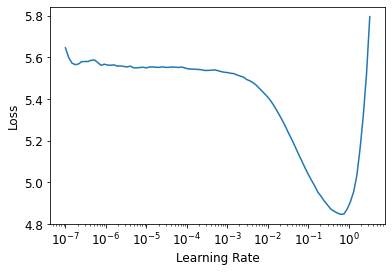

In [126]:
learn.lr_find()

In [127]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.875723,3.426308,0.419049,30.762846,00:13


In [128]:
learn.unfreeze()
learn.fit_one_cycle(10, 2e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.152755,3.239387,0.443850,25.518076,00:14
1,3.007159,3.089320,0.466566,21.962132,00:14
2,2.781636,3.010102,0.480196,20.289461,00:14
3,2.465196,3.037214,0.488061,20.847073,00:14
4,2.143196,3.122042,0.490813,22.692669,00:14
5,1.808345,3.249790,0.490219,25.784929,00:14
6,1.528556,3.369920,0.488392,29.076216,00:14
7,1.302078,3.461443,0.488605,31.862913,00:14
8,1.155385,3.494517,0.488900,32.934364,00:14
9,1.066465,3.519595,0.489035,33.770752,00:14


In [129]:
learn.save_encoder('/content/drive/MyDrive/finetuned_64')

In [130]:
TEXT = "Just got sent this photo"
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]

In [95]:
print("\n".join(preds))

Just got sent this photo from Congress at 02 on the # Tsunami # Hiroshima http : / / t.co / TV Tell me how to get flattened by the same way .. http : / / t.co /
Just got sent this photo from Anchorage TCOT http : / / t.co / @youtube # Anchorage Smoke the Sirens - Full Hop ! http : / / t.co / giant http : / / t.co /


## Fine-tuning the Clasifier

In [131]:
blocks = (
    TextBlock.from_df(
        'text', 
        seq_len=dls_lm.seq_len, 
        vocab=dls_lm.vocab
        ), 
    CategoryBlock()
)

dls = DataBlock(
    blocks=blocks,
    get_x=ColReader('text'),
    get_y=ColReader('target'),
    splitter=RandomSplitter(0.2)
)

In [132]:
dls_clas = dls.dataloaders(train, bs=64)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [133]:
dls_clas.show_batch(max_n=3)

,text,category
0,xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n\n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
1,xxbos xxup info xxup s. xxup wnd : xxunk / 6 . xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .,0
2,xxbos xxup info xxup r. xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup wnd : xxunk / 5 . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup xxunk . xxup tmp : 10 . xxup xxunk : xxunk .,0


In [134]:
len(dls_clas.train_ds), len(dls_clas.valid_ds)

(6091, 1522)

In [135]:
learn = text_classifier_learner(
    dls_clas, 
    AWD_LSTM, 
    metrics=[accuracy, FBeta(beta=1)]
    ).to_fp16()

learn.load_encoder('/content/drive/MyDrive/finetuned_64')

In [136]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.550124,0.451741,0.796321,0.735043,00:09


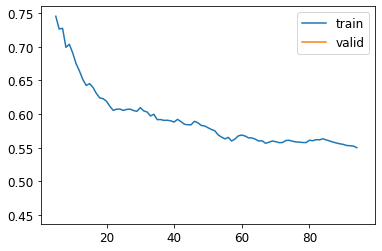

In [137]:
learn.recorder.plot_loss()

Gradual Unfreezing
The idea behind gradual unfreezing is that fine-tuning a classifier on all layers can result in catastrophic forgetting and thus each layer staring form the last layer is trained one after the other by freezing all the lower layers and only training the layer in question.

The paper empirically found that after training the last layer of the model with a learning rate of lr, the subsequent layers can be trained one after another by reducing lr by a factor of 2.6.

In [107]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.520089,0.446929,0.797635,0.745455,00:08


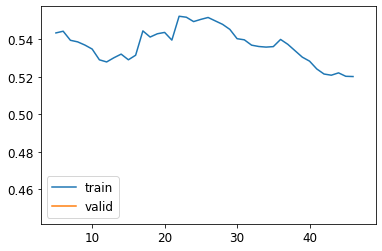

In [108]:
learn.recorder.plot_loss()

In [109]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.490359,0.440019,0.805519,0.754561,00:08


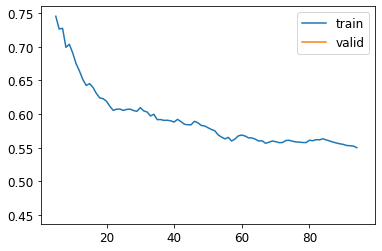

In [138]:
learn.recorder.plot_loss()

In [139]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.505724,0.429095,0.814060,0.773419,00:10
1,0.469626,0.415671,0.819974,0.776144,00:09


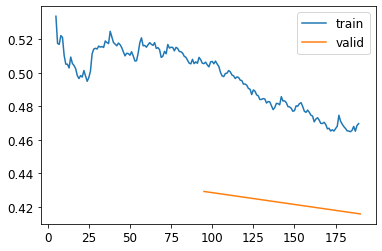

In [140]:
learn.recorder.plot_loss()

In [141]:
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.463307,0.409988,0.829829,0.788226,00:10
1,0.435569,0.414429,0.825887,0.784728,00:09


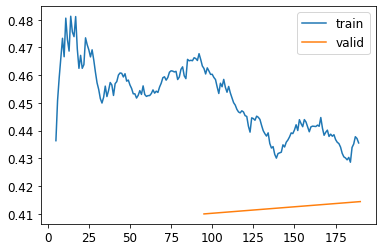

In [142]:
learn.recorder.plot_loss()

In [143]:
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.419550,0.420449,0.823259,0.782186,00:09
1,0.402043,0.420219,0.820631,0.785546,00:09


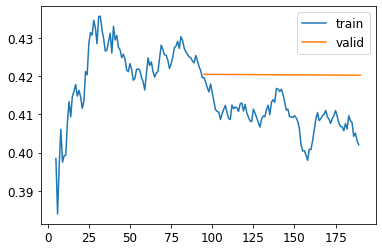

In [144]:
learn.recorder.plot_loss()

In [112]:
learn.fit_one_cycle(10, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.404969,0.458133,0.805519,0.762058,00:08
1,0.395388,0.471301,0.804205,0.767551,00:09
2,0.386453,0.486724,0.791064,0.751562,00:08
3,0.368622,0.493417,0.800920,0.758566,00:09
4,0.340316,0.537517,0.795664,0.751001,00:09
5,0.322507,0.539325,0.795007,0.757764,00:09
6,0.302525,0.559155,0.804205,0.763492,00:08
7,0.288417,0.574083,0.785151,0.750952,00:08
8,0.271827,0.578967,0.795664,0.757599,00:09
9,0.269590,0.575588,0.793693,0.756211,00:09


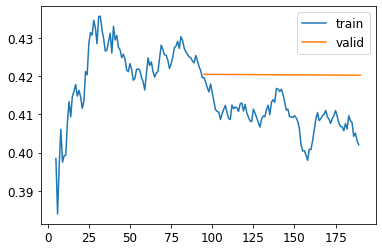

In [145]:
learn.recorder.plot_loss()

In [146]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)

In [147]:
interp.print_classification_report()

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       876
           1       0.80      0.77      0.79       646

    accuracy                           0.82      1522
   macro avg       0.82      0.81      0.82      1522
weighted avg       0.82      0.82      0.82      1522



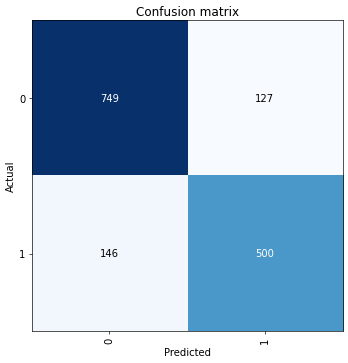

In [149]:
interp.plot_confusion_matrix(figsize=(6, 6), dpi=60)

In [161]:
interp.plot_top_losses(10, rorws=1)

,input,target,predicted,probability,loss
0,xxbos xxmaj if you 're in search of powerful content to xxunk your business or have been xxunk with the deluge of ' xxunk : / / t.co / xxunk,1,0,0.9945677518844604,5.215407848358154
1,xxbos xxmaj survivors of xxmaj shanghai xxmaj xxunk xxunk after 70 years - http : / / t.co / xxunk # xxmaj shanghai # xxmaj china # ? ?,0,1,0.9876400828361511,4.393296241760254
2,xxbos ' xxunk : 6 . @ your xxunk / gf / crush ? ? ' xxunk ? ?,1,0,0.986151397228241,4.279570579528809
3,xxbos xxmaj me watching xxmaj law & & xxmaj order ( xxunk : xxunk ) ( vine by xxunk ) https : / / t.co / xxunk,1,0,0.9859904050827026,4.268014907836914
4,xxbos xxmaj former xxmaj township fire truck being used in xxmaj philippines - xxmaj langley xxmaj times http : / / t.co / xxunk # xxunk,0,1,0.9841545820236206,4.144878387451172
5,xxbos xxmaj hereûªs how media in xxmaj pakistan covered the capture of terrorist xxmaj xxunk xxmaj naved http : / / t.co / xxunk,0,1,0.9812389612197876,3.975970506668091
6,xxbos i liked a @youtube video from xxunk http : / / t.co / xxunk xxup gun xxup range xxup mayhem !,1,0,0.9808942675590515,3.9577672481536865
7,xxbos ' i did another one i did another one . xxmaj you still ai n't done shit about the other one . ' xxmaj nigga body bagging xxmaj meek .,1,0,0.9796287417411804,3.8936285972595215
8,xxbos xxmaj and please do n't flood poor xxunk 's mentions . xxmaj he 's put in his work !,1,0,0.9791356921195984,3.869717836380005
9,xxbos i xxmaj will xxmaj survive by xxmaj xxunk xxmaj xxunk ( with xxmaj xxunk xxmaj xxunk ) ûó https : / / t.co / xxunk,1,0,0.9765130281448364,3.7513062953948975


#other


## text preprocessing

In [ ]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

train_df["text"] = train_df["text"].apply(remove_URL)
test_df["text"] = test_df["text"].apply(remove_URL)

In [ ]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

train_df["text"] = train_df["text"].apply(remove_html)
test_df["text"] = test_df["text"].apply(remove_html)

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

train_df["text"] = train_df["text"].apply(remove_emoji)
test_df["text"] = test_df["text"].apply(remove_emoji)

## word embeddings

## xgboost